## PYTS Classification

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.7 MB/s eta 0:00:00


In [3]:
pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 12.5 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sktime.datasets import load_from_tsfile
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.stats import randint as sp_randint
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc


In [2]:
def plot_roc_curve(roc_auc_train, roc_auc_test):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_tr, tpr_tr, 'g', label = 'Training AUC = %0.2f' % roc_auc_train)
    plt.plot(fpr_ts, tpr_ts, 'b', label = 'Testing AUC = %0.2f' % roc_auc_test)
    # plt.plot(fpr_val, tpr_val, 'r', label = 'Validation AUC = %0.2f' % roc_auc_val)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [3]:
 pip install tslearn

In [4]:
X, y = load_from_tsfile("/Users/PRADEEP SHETTY/Desktop/IEEE internship/final.ts",return_data_type="numpy3d")#,return_data_type="numpy3d"

In [5]:
print(X.shape)

(1144, 1, 24)


In [6]:
print(type(X))

<class 'numpy.ndarray'>


In [7]:
X1= X.reshape(X.shape[0], (X.shape[1]*X.shape[2]))
print("Original array:\n",X.shape )
print("Reshaped array:\n",X1.shape)

Original array:
 (1144, 1, 24)
Reshaped array:
 (1144, 24)


In [8]:
print(X1)

[[  0.     0.     0.   ...  41.53  32.45 148.73]
 [  8.     4.08   7.07 ... 120.05  46.52  67.87]
 [ 69.7   22.25  11.02 ... 178.12  58.2   36.7 ]
 ...
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]


In [9]:
from tslearn.utils import to_pyts_dataset

In [10]:
pyts_arr = to_pyts_dataset(X1)

In [11]:
print(pyts_arr)

[[  0.     0.     0.   ...  41.53  32.45 148.73]
 [  8.     4.08   7.07 ... 120.05  46.52  67.87]
 [ 69.7   22.25  11.02 ... 178.12  58.2   36.7 ]
 ...
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pyts_arr, y,random_state=42,test_size=0.2,stratify=y)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,random_state=42,test_size=0.5,stratify=y_temp)

In [13]:
print(X_train.shape)

(915, 24)


In [14]:
# print(X_val.shape)

In [15]:
print(X_test.shape)

(229, 24)


In [16]:
print(y_train)

['0' '0' '1' '1' '0' '1' '0' '1' '0' '1' '1' '0' '0' '0' '0' '0' '1' '0'
 '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '1' '1' '0' '1'
 '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '1' '1'
 '1' '1' '1' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '0' '1' '1' '0' '1'
 '0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '1' '1' '1' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '1'
 '1' '1' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '1' '1'
 '0' '1' '0' '1' '0' '0' '0' '0' '1' '1' '0' '1' '1' '1' '0' '0' '0' '1'
 '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '1' '1' '1' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0

In [18]:
import numpy as np
from pyts.datasets import load_gunpoint
from pyts.classification import TimeSeriesForest
import matplotlib.pyplot as plt


clf = TimeSeriesForest(random_state=43,n_estimators=20)
clf.fit(X_train, y_train)

TimeSeriesForest(n_estimators=20, random_state=43)

In [19]:
y_test_numerical = y_test.astype(int)

In [20]:
y_train_numerical = y_train.astype(int)

In [23]:
# y_val_numerical = y_val.astype(int)

In [23]:
y_pred = clf.predict(X_test)
y_pred_train=clf.predict(X_train)

In [24]:
y_pred_numerical = y_pred.astype(int)

In [25]:
print(X_train.shape)

(915, 24)


In [26]:
# Calculate accuracy
accuracy_test= accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy_test:", accuracy_test)
print("Accuracy_train:", accuracy_train)

Accuracy_test: 0.8034934497816594
Accuracy_train: 0.9901639344262295


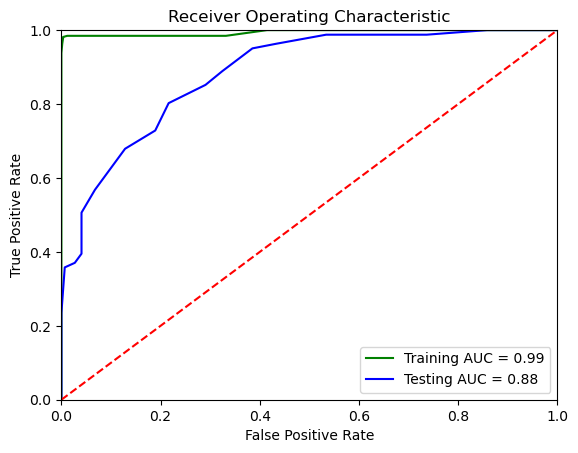

In [27]:
y_pred_train = clf.predict_proba(X_train)[:,1]
y_pred_test = clf.predict_proba(X_test)[:,1]
# y_pred_val = clf.predict_proba(X_val)[:,1]

#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(y_train_numerical, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_test_numerical, y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

# fpr_val, tpr_val, threshold = roc_curve(y_val_numerical, y_pred_val)
# roc_auc_val = auc(fpr_val, tpr_val)

#Plot ROC curve
plot_roc_curve(roc_auc_train, roc_auc_test)

In [28]:
def plot_conf_matrix (conf_matrix, dtype):
    class_names = [0,1]
    fontsize=14
    df_conf_matrix = pd.DataFrame(
            conf_matrix, index=class_names, columns=class_names,
        )
    fig = plt.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for {0}'.format(dtype))

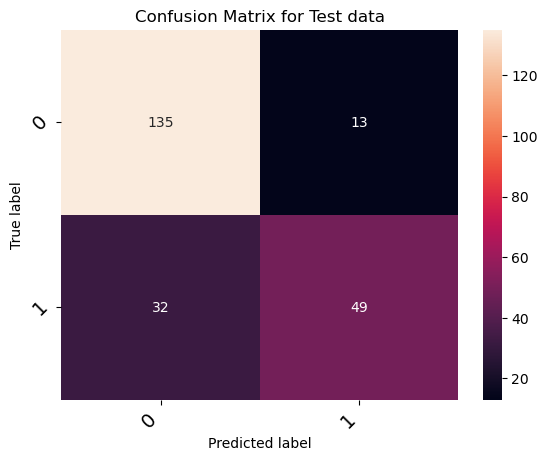

In [29]:
plot_conf_matrix(confusion_matrix(y_test, y_pred), "Test data")

In [30]:
param_dist = {"max_depth": [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],  # 3 - 24
              # "max_features": sp_randint(1, 20),
              # "min_samples_split": sp_randint(2, 20),
              # "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "max_leaf_nodes":[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], #5 - 20
              "n_estimators":[50,100,150,200], #50,100,150,200
              "min_samples_leaf":[5,6,7,8,9,10,11,12,13,14,15,] #5 - 15
              }

In [35]:
clf = TimeSeriesForest()

# Randomized search
random_search = RandomizedSearchCV(clf,param_distributions=param_dist,n_iter=50, cv=5,scoring="accuracy" )

random_search.fit(X_train, y_train)

print(random_search.best_params_)

{'n_estimators': 200, 'min_samples_leaf': 10, 'max_leaf_nodes': 18, 'max_depth': 21, 'criterion': 'gini'}


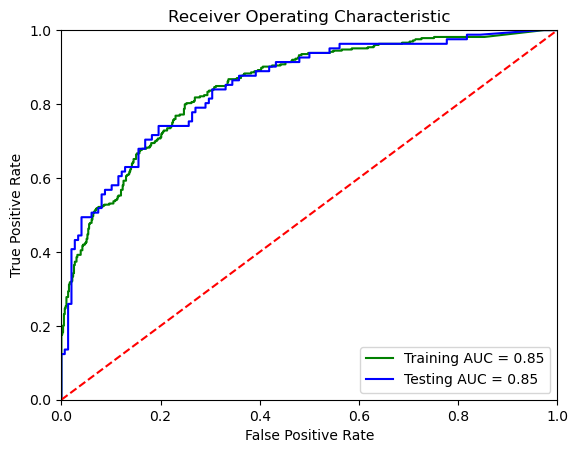

In [36]:
clf = TimeSeriesForest(n_estimators=100,random_state=43,
                             criterion= 'gini', max_depth = 13,
                             max_leaf_nodes=7,min_samples_leaf=10)
clf.fit(X_train, y_train)

y_pred_train = clf.predict_proba(X_train)[:,1]
y_pred_test = clf.predict_proba(X_test)[:,1]
# y_pred_val = clf.predict_proba(X_val)[:,1]

#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(y_train_numerical, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_test_numerical, y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

# fpr_val, tpr_val, threshold = roc_curve(y_val_numerical, y_pred_val)
# roc_auc_val = auc(fpr_val, tpr_val)

#Plot ROC curve
plot_roc_curve(roc_auc_train, roc_auc_test)


In [37]:
accuracy_training = accuracy_score(y_train, clf.predict(X_train))
accuracy_testing = accuracy_score(y_test, clf.predict(X_test))
# accuracy_validation = accuracy_score(y_val, clf.predict(X_val))

print("training_accuracy:",accuracy_training)
print("testing_accuracy:",accuracy_testing)
# print("validation_accuracy:",accuracy_validation)

training_accuracy: 0.7704918032786885
testing_accuracy: 0.7860262008733624


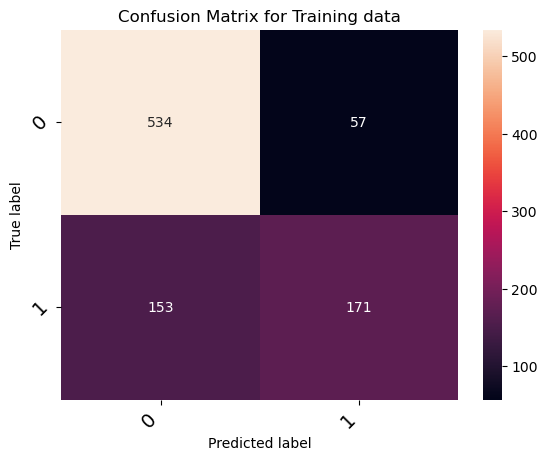

In [38]:
plot_conf_matrix(confusion_matrix(y_train, clf.predict(X_train)), "Training data")

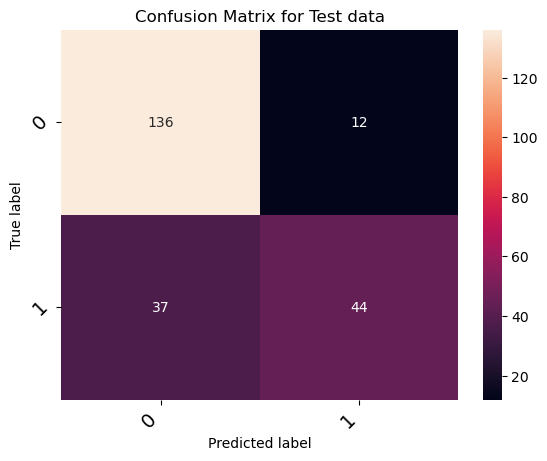

In [39]:
plot_conf_matrix(confusion_matrix(y_test, clf.predict(X_test)), "Test data")

In [40]:
from sklearn.metrics import precision_score

pre=precision_score(y_test_numerical, y_pred_numerical)
print("Precision:",pre)

Precision: 0.7903225806451613


In [41]:
from sklearn.metrics import recall_score
recall=recall_score(y_test_numerical, y_pred_numerical)
print(recall)

0.6049382716049383


In [42]:
from sklearn.metrics import f1_score
f1=f1_score(y_test_numerical, y_pred_numerical)
print(f1)

0.6853146853146853
